## Número de agrupaciones utilizando gráfica K-Elbow

En este primer tema comenzaremos por cargar y visualizar algunas propiedades de una de las Bases de Datos de estudio que estaremos utilizando. Aprenderás a agrupar datos usando la biblioteca de Python Scikit-Learn y a determinar el número adecuado de agrupaciones a partir de la gráfica K-Elbow. 

Posiblemente el algoritmo de agrupamiento más conocido y utilizado es el K-means, por lo que agruparemos datos con este algoritmo. De sus varios parámetros, el más importante es el número de agrupaciones que se desea obtener. El resto de los parámetros del algoritmo no los estaremos analizando por el momento.

Iniciemos cargando la Base de Datos Iris desde Scikit-Learn. Esta Base de Datos describe las características de 150 plantas Iris divididas en 3 grupos (especies). Esas características son: largo del tallo, ancho del tallo, largo de pétalo y ancho del pétalo. Para tener una idea de la distribución de los datos, grafiquemos las últimas dos características.

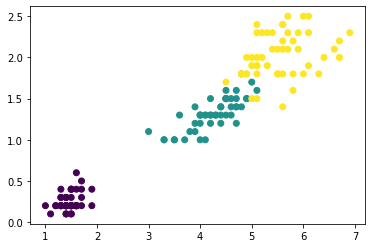

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics
from sklearn import cluster, datasets



iris = datasets.load_iris()
X = np.array(iris.data)
y = np.array(iris.target)
plt.scatter(X[:, 2], X[:, 3], c=y)

Como se puede apreciar, hay dos especies parecidas y una tercera con características diferentes. Si no conociéramos previamente esta información no sabríamos si, al agrupar los datos, debemos hacerlo en dos, tres o más grupos. Una estrategia muy utilizada es agrupar con distintas cantidades de grupo y escoger la mejor agrupación según una medida de calidad o de validación de los resultados. Una “regla de dedo” es probar con una cantidad de grupos en un rango desde dos grupos hasta la raíz cuadrada de la cantidad de objetos.

Veamos como lo haríamos en Python guardando en un diccionario los resultados del índice de validación Silhouette.

El índice Silhouette es una métrica para evaluar la calidad del agrupamiento obtenido con algoritmos de clustering. El objetivo de Silueta es identificar cuál es el número óptimo de agrupamientos.

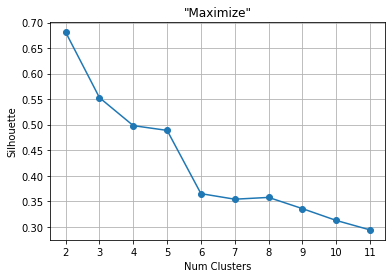

In [2]:
results = {}

for k in range(2, int(np.sqrt(len(X)))):
    k_means = cluster.KMeans(n_clusters=k).fit(X)
    y_pred = k_means.predict(X)
    results[k] = metrics.silhouette_score(X, y_pred)
    clusters_counts = list(results.keys())
    index_values = list(results.values())

# K-Elbow!
plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()


Como se muestra en la imagen, los valores del índice Silhouette van decreciendo a medida que el número de grupos va en aumento. Con este índice, los valores más grandes significan mejores resultados del agrupamiento, por lo tanto, para dos grupos se obtuvo un mejor resultado que para tres. Tiene sentido si nos damos cuenta de que es más fácil separar los datos en dos grupos, poniendo en un grupo la especie que es muy diferente y en el otro las dos especies parecidas. Si no conociéramos el “ground truth” de las ‘tres’ especies, este resultado sería perfectamente válido.



¿Y por qué se llama la gráfica K-Elbow? Porque varios índices tienen tendencia a devolver siempre mayores o menores valores a medida que el número de grupos aumenta. En esos casos, en lugar de solo fijarnos en el mayor o menor valor, buscaríamos los ‘codos’ en la gráfica. Por ejemplo, hay un ‘codo’ para cinco grupos, por lo que probablemente ese agrupamiento es bastante mejor que formar seis grupos o cuatro grupos.



Ahora sabes cómo realizar varias tareas muy importantes dentro del proceso de agrupamiento de datos. Es más, podemos decir que eres capaz de resolver este problema con los datos de tu organización, ya que en el ejemplo anterior completamos todo el proceso de agrupamiento. Obviamente faltan muchos otros detalles por aprender, pero ya eres capaz de agrupar datos y escoger el número de grupos adecuados para el análisis, y eso en pocas líneas de código.

## Índice Calinski-Harabasz

Si no se conoce la distribución esperada de los grupos de datos, como en la mayoría de los problemas de este tipo que se nos presentan en Ciencia de Datos, entonces debemos realizar un proceso similar al aprendido en el tema anterior. Sin embargo, el índice Silhouette no es el único criterio 
de calidad para validar los resultados. Múltiples índices se han propuesto en la literatura, y la elección del índice correcto depende de muchas variables. Incluso, podemos decir que decidir cuál es el índice de validación de agrupamientos adecuado 
es unos de los problemas más difíciles de resolver, y hasta la fecha no se ha encontrado solución, dentro del Aprendizaje Automatizado o Machine Learning

¿Qué podemos hacer entonces? Conocer nuevos índices y estrategias de validación, sus ventajas y desventajas, y utilizarlos en consecuencia.

En este tema conocerás el índice de Calinski-Harabasz, también conocido como Criterio de Relación de Varianza.Coomo se mencionó, este índice se puede utilizar para evaluar agruamientos. Donde una puntuación de Calinski - Harabasz más alta se relaciona con un agrupamiento o grupos mejor definidos. El índice es la relación de la suma de la dispersión entre los grupos y la dispersión dentro de cada grupo.

In [3]:
# Aplicación del índice de Calinski - Harabasz

wine = datasets.load_wine()
X = np.array(wine.data)
y = np.array(wine.target)

y_preds = []
results = {}

In [4]:
for k in range(2, int(np.sqrt(len(X)))):
    k_means = cluster.KMeans(n_clusters=k).fit(X)
    y_pred = k_means.predict(X)
    y_preds.append(y_pred)
    results[k]=metrics.calinski_harabasz_score(X, y_pred)
    clusters_counts = list(results.keys())
    index_values = list(results.values())

Nota que en la variable y_preds se almacenan todos los agrupamientos.

A continuación, vamos a mostrar el resultado del segundo agrupamiento, que se corresponde con tres grupos, la misma cantidad que el “ground truth” de esta Base de Datos. También mostraremos la gráfica K-Elbow:

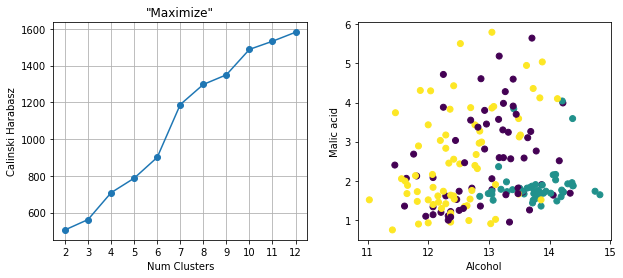

In [5]:
fig,(ax0,ax1) = plt.subplots(ncols=2, figsize=(10,4))
    

ax1.scatter(X[:,0],X[:,1],c=y_preds[1])
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Calinski Harabasz')

plt.show()

Si analizamos la gráfica K-Elbow, teniendo en cuenta que mayores valores del índice se corresponden con mejores resultados, vemos que doce grupos es la mejor opción, mientras que 10 grupos también sería un resultado adecuado. Pero ¿no son solo tres grupos los esperados?, ¿qué pasó entonces? Podríamos cuestionarnos si este índice es correcto o no, o si el algoritmo Kmeans no agrupa bien. Lo cierto es que todos los cuestionamientos son válidos y las respuestas casi siempre las encontramos analizando más profundamente los datos. La mayor parte del tiempo estaremos haciendo este tipo de análisis en aplicaciones reales.

Veamos entonces los datos. Si analizamos solo las dos primeras columnas Alcohol y Malic acid, podemos ver que los rangos de valores difieren en una unidad de magnitud (10). Esto es una gran diferencia para los algoritmos. Seguramente, este comportamiento también se da para las otras columnas. ¿Por qué esto afecta a los algoritmos?, porque las diferencias en unas columnas pesarán más que en otras y ‘apagarían’ a las columnas con menores valores. ¿Qué hacer entonces?: transformar los datos. De momento, solo estandarizar la Base de Datos resuelve este problema y nos ayuda a obtener excelentes resultados, veamos:

In [6]:
from sklearn.preprocessing import StandardScaler

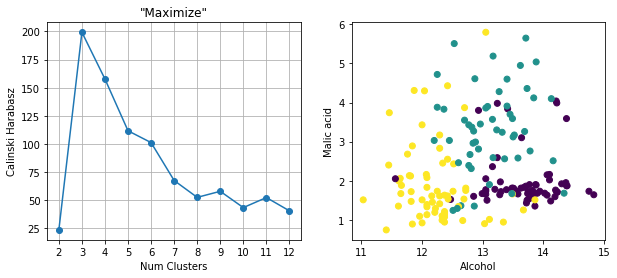

In [7]:
X2 = StandardScaler().fit_transform(X)
y_preds, results = [], {}

for k in range(2, int(np.sqrt(len(X2)))):
    k_means = cluster.KMeans(n_clusters=k).fit(X2)
    y_pred = k_means.predict(X2)
    y_preds.append(y_pred)
    results[k] = metrics.calinski_harabasz_score(X, y_pred)
    clusters_counts = list(results.keys())
    index_values = list(results.values())

fig,(ax0,ax1) = plt.subplots(ncols=2,
figsize=(10,4))

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Calinski Harabasz')
ax1.scatter(X[:, 0], X[:, 1], c=y_preds[1])
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

plt.show()